В предыдущих модулях вы видели, как работать с данными. В реальных проектах данные зачастую не лежат в готовом виде, и для анализа вам нужно сначала их собрать, например, скопировав со сторонних веб-сайтов.

В этом модуле мы рассмотрим, как Python позволяет упростить подобный сбор информации и даже получить доступ к данным, которые руками собрать невозможно. В частности, мы рассмотрим:

в каком виде информация обычно располагается в интернете;
напишем скрипты, которые собирают данные с веб-сайтов, используя библиотеки requests и BeautifulSoup;
разберёмся, что такое программный интерфейс веб-сервисов (API) и как его использовать; для примера мы будем забирать данные из ВКонтакте.
К концу модуля вы сможете писать программы, которые могут избавить вас от многих часов монотонной работы и расширят спектр собираемой информации.

ПОСТАНОВКА ЗАДАЧИ

В этом блоке мы рассмотрим основы автоматизированных веб-запросов на примере задачи получения курсов валют. Курс валют – полезная и регулярно обновляемая информация, но залезать каждый раз на сайт за ним трудоёмко. Значит, вам нужен скрипт, который будет в удобном виде выгружать информацию по курсам валют.

Будем использовать сервис cbr-xml-daily.ru. Он возвращает информацию о курсах валют в структурированном формате JSON и в дальнейшем мы расширим это подход на произвольные html страницы.

Итак, нам необходима функция, возвращающая курс заданной валюты в двух форматах:

Только значение курса валюты.
Полную информацию о валюте: курс, название, номинал и другие характеристики.

ВЕБ-ЗАПРОСЫ

Мы будем работать с веб-запросами и для начала полезно будет вспомнить, как работает интернет.

Один компьютер (клиент) отправляет запрос в определённом формате другому компьютеру (серверу) и получает в ответ текст и мультимедийные файлы (картинки, видео). Обычно это происходит по протоколу http, который формализует это общение.

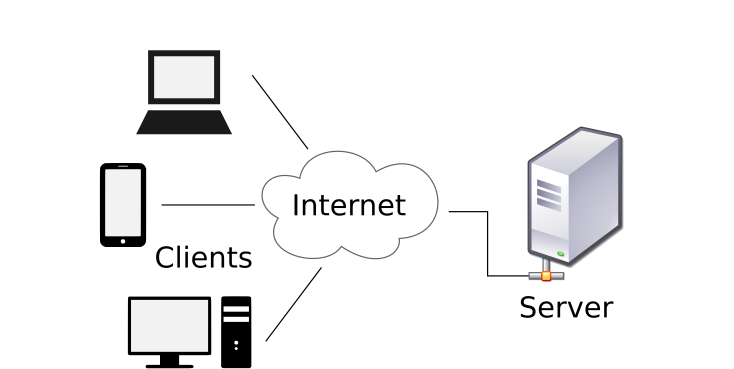

Запрос в http состоит из нескольких частей:

Адрес, по которому мы обращаемся (это то, что вы вводите в строке браузера, например www.google.com)

Техническая информация, вроде кукисов и метода запроса

Иногда ещё дополнительные данные, например если вы сами загружаете картинку.
Ответ содержит:


Статус ответа: 200 для успешного ответа; 404, если адрес не найден и т.д. Полный список http статусов можно посмотреть здесь

Текст в запрошенном формате (html, xml, json...) или мультимедийные файлы
Техническую информацию.

В протоколе HTTP запросы могут делаться с помощью одного из так называемых методов. Самые популярные — это GET и POST


Метод GET просто получает текстовую информацию или мультимедийный файл по адресу. Вы как бы говорите "хочу получить страницу по адресу www.google.com" и сервер вам отвечает "200, ок, держи вот html". Это самый базовый метод.

Метод POST служит для отправки форм; помимо адреса он может заворачивать в себя дополнительные данные, вроде полей формы или картинок. Вы как бы заворачиваете посылку и отдаёте её почтальону. 

Обычно всю эту работу делает браузер, но мы можем делать эти же запросы из кода. Мы могли бы даже написать свой маленький браузер на python, но в этом модуле мы сосредоточимся на автоматическом сборе информации.

БИБЛИОТЕКА REQUESTS

Сначала разберемся, как получить информацию с внешнего сервиса. В стандартной библиотеке есть модуль urllib2, который может справиться с этой задачей. Однако большинство разработчиков используют стороннюю библиотеку requests, потому что в ней лучше реализованы большинство методов и код получается проще. Перед началом работы библиотеку потребуется установить с помощью вашего пакетного менеджера, например, с помощью следующей команды в консоли.

In [1]:
#python -m pip install requests 

SyntaxError: ignored

Далее мы импортируем библиотеку и отправим запрос к сервису с помощью метода GET к сервису с курсами валют:

In [2]:
import requests  
response = requests.get('https://www.cbr-xml-daily.ru/daily_json.js') 

In [3]:
response

<Response [200]>

Мы получили объект ответа, который содержит всю нужную нам информацию. По умолчанию на экран выводится HTTP-код ответа 200. Это означает, что запрос был корректным, и сервер отдал нам нужную информацию.

In [4]:
print(response.status_code)  
#=> 200 

200


Допустим, вы уже импортировали модуль requests в ваш код. Какая команда сделает GET запрос к сайту https://www.cbr-xml-daily.ru/daily.xml и положит результат в переменную response?

Мы сделали запрос и получили ответ. Давайте теперь посмотрим, как считывать текст. 

Адрес, по которому мы обращались, возвращает результат в json формате. Эти данные уже лежат в атрибуте text в полученном ответе response.

In [5]:
import requests    
response = requests.get('https://www.cbr-xml-daily.ru/daily_json.js')    
print(response.text)  


{
    "Date": "2023-03-18T11:30:00+03:00",
    "PreviousDate": "2023-03-17T11:30:00+03:00",
    "PreviousURL": "\/\/www.cbr-xml-daily.ru\/archive\/2023\/03\/17\/daily_json.js",
    "Timestamp": "2023-03-19T20:00:00+03:00",
    "Valute": {
        "AUD": {
            "ID": "R01010",
            "NumCode": "036",
            "CharCode": "AUD",
            "Nominal": 1,
            "Name": "Австралийский доллар",
            "Value": 51.4322,
            "Previous": 50.713
        },
        "AZN": {
            "ID": "R01020A",
            "NumCode": "944",
            "CharCode": "AZN",
            "Nominal": 1,
            "Name": "Азербайджанский манат",
            "Value": 45.0614,
            "Previous": 44.9468
        },
        "GBP": {
            "ID": "R01035",
            "NumCode": "826",
            "CharCode": "GBP",
            "Nominal": 1,
            "Name": "Фунт стерлингов Соединенного королевства",
            "Value": 92.7603,
            "Previous": 91.9053
    

Вы можете посмотреть на полный текст, повторив запрос или на этой странице в вашем браузере.

Сейчас текст хранится просто в строковой переменной. Далее мы можем превратить эту строку в словарь. Сделать это можно с помощью JSON-парсера python, либо воспользовавшись методом json, который уже встроен в объект ответа response.

In [6]:
currencies = response.json()
print(currencies)  

{'Date': '2023-03-18T11:30:00+03:00', 'PreviousDate': '2023-03-17T11:30:00+03:00', 'PreviousURL': '//www.cbr-xml-daily.ru/archive/2023/03/17/daily_json.js', 'Timestamp': '2023-03-19T20:00:00+03:00', 'Valute': {'AUD': {'ID': 'R01010', 'NumCode': '036', 'CharCode': 'AUD', 'Nominal': 1, 'Name': 'Австралийский доллар', 'Value': 51.4322, 'Previous': 50.713}, 'AZN': {'ID': 'R01020A', 'NumCode': '944', 'CharCode': 'AZN', 'Nominal': 1, 'Name': 'Азербайджанский манат', 'Value': 45.0614, 'Previous': 44.9468}, 'GBP': {'ID': 'R01035', 'NumCode': '826', 'CharCode': 'GBP', 'Nominal': 1, 'Name': 'Фунт стерлингов Соединенного королевства', 'Value': 92.7603, 'Previous': 91.9053}, 'AMD': {'ID': 'R01060', 'NumCode': '051', 'CharCode': 'AMD', 'Nominal': 100, 'Name': 'Армянских драмов', 'Value': 19.7292, 'Previous': 19.6612}, 'BYN': {'ID': 'R01090B', 'NumCode': '933', 'CharCode': 'BYN', 'Nominal': 1, 'Name': 'Белорусский рубль', 'Value': 26.891, 'Previous': 26.8226}, 'BGN': {'ID': 'R01100', 'NumCode': '975

In [7]:
import json # Импорт модуля json
currencies = json.dumps(currencies) # Функция dumps() модуля json сериализирует объект Python в строку формата JSON. 
with open("currencies.json", "w") as write_file: # Откроем файл new_recipes.json для записи
    write_file.write(currencies) 

In [9]:
import pandas as pd
df = pd.read_json('currencies.json') # Создаём объект DataFrame, загружая содержимое файла recipes.json
display(df.head(2))

,Date,PreviousDate,PreviousURL,Timestamp,Valute
AED,2023-03-18 11:30:00+03:00,2023-03-17T11:30:00+03:00,//www.cbr-xml-daily.ru/archive/2023/03/17/dail...,2023-03-19 20:00:00+03:00,"{'ID': 'R01230', 'NumCode': '784', 'CharCode':..."
AMD,2023-03-18 11:30:00+03:00,2023-03-17T11:30:00+03:00,//www.cbr-xml-daily.ru/archive/2023/03/17/dail...,2023-03-19 20:00:00+03:00,"{'ID': 'R01060', 'NumCode': '051', 'CharCode':..."


In [38]:
df.Valute

AED    {'ID': 'R01230', 'NumCode': '784', 'CharCode':...
AMD    {'ID': 'R01060', 'NumCode': '051', 'CharCode':...
AUD    {'ID': 'R01010', 'NumCode': '036', 'CharCode':...
AZN    {'ID': 'R01020A', 'NumCode': '944', 'CharCode'...
BGN    {'ID': 'R01100', 'NumCode': '975', 'CharCode':...
BRL    {'ID': 'R01115', 'NumCode': '986', 'CharCode':...
BYN    {'ID': 'R01090B', 'NumCode': '933', 'CharCode'...
CAD    {'ID': 'R01350', 'NumCode': '124', 'CharCode':...
CHF    {'ID': 'R01775', 'NumCode': '756', 'CharCode':...
CNY    {'ID': 'R01375', 'NumCode': '156', 'CharCode':...
CZK    {'ID': 'R01760', 'NumCode': '203', 'CharCode':...
DKK    {'ID': 'R01215', 'NumCode': '208', 'CharCode':...
EGP    {'ID': 'R01240', 'NumCode': '818', 'CharCode':...
EUR    {'ID': 'R01239', 'NumCode': '978', 'CharCode':...
GBP    {'ID': 'R01035', 'NumCode': '826', 'CharCode':...
GEL    {'ID': 'R01210', 'NumCode': '981', 'CharCode':...
HKD    {'ID': 'R01200', 'NumCode': '344', 'CharCode':...
HUF    {'ID': 'R01135', 'NumCod

Теперь данные лежат в словаре и мы можем легко получать необходимые нам значения.

In [ ]:
currencies = response.json()
print(currencies)  

In [12]:
currencies['Valute']['UAH']

{'ID': 'R01720',
 'NumCode': '980',
 'CharCode': 'UAH',
 'Nominal': 10,
 'Name': 'Украинских гривен',
 'Value': 20.7422,
 'Previous': 20.6983}

Повторите запросы, описанные в этой части, на своём компьютере. Что выведет на экран следующий код?

In [13]:
print(currencies['Valute']['CZK']['Name'])

Чешских крон


В завершение давайте оформим наши вычисления в отдельную функцию, которой будет удобно пользоваться. На вход она должна принимать два параметра:

Название валюты currency. Например, 'EUR' или 'USD'.
Формат ответа format. При значении 'full' будем отдавать все, что знаем о валюте. Например, для currency = 'USD':

In [14]:
{'CharCode': 'USD',  
   'ID': 'R01235',  
   'Name': 'Доллар США',  
   'Nominal': 1,  
   'NumCode': '840',  
   'Previous': 68.2505,  
   'Value': 69.0286} 

{'CharCode': 'USD',
 'ID': 'R01235',
 'Name': 'Доллар США',
 'Nominal': 1,
 'NumCode': '840',
 'Previous': 68.2505,
 'Value': 69.0286}

А при значении format = 'value' только значение ключа 'Value', т. е. курс: 69.0286.

Оформим наши требования в коде:

In [3]:
import pandas as pd
import requests  

url = 'https://www.cbr-xml-daily.ru/daily_json.js'  
response = requests.get(url)
df = pd.read_json(response.text) # Создаём объект DataFrame, загружая содержимое файла recipes.json
display(df.head(2))

,Date,PreviousDate,PreviousURL,Timestamp,Valute
AED,2023-03-18 11:30:00+03:00,2023-03-17T11:30:00+03:00,//www.cbr-xml-daily.ru/archive/2023/03/17/dail...,2023-03-20 13:00:00+03:00,"{'ID': 'R01230', 'NumCode': '784', 'CharCode':..."
AMD,2023-03-18 11:30:00+03:00,2023-03-17T11:30:00+03:00,//www.cbr-xml-daily.ru/archive/2023/03/17/dail...,2023-03-20 13:00:00+03:00,"{'ID': 'R01060', 'NumCode': '051', 'CharCode':..."


In [58]:
df.loc['AED']['Valute']

{'ID': 'R01230',
 'NumCode': '784',
 'CharCode': 'AED',
 'Nominal': 1,
 'Name': 'Дирхам ОАЭ',
 'Value': 20.8572,
 'Previous': 20.8047}

In [63]:
df.loc[df.index[0]]["Valute"]['Name']

'Дирхам ОАЭ'

In [ ]:
df.loc[id]["Valute"]['Name']

In [67]:
value_=[]
for item in df.index:
    value=df.loc[item]["Valute"]['ID']
    value_.append(value)
value_[0]    

'R01230'

In [15]:
def exchange_rates(currency, format='full'):    
    url = 'https://www.cbr-xml-daily.ru/daily_json.js'  
    response = requests.get(url).json()['Valute']    
    data = response[currency]     
    if format == 'full':    
        return data      
    elif format == 'value':    
        return data['Value'] 

In [17]:
exchange_rates('USD')

{'ID': 'R01235',
 'NumCode': '840',
 'CharCode': 'USD',
 'Nominal': 1,
 'Name': 'Доллар США',
 'Value': 76.6044,
 'Previous': 76.4095}

Напишите функцию currency_name, которая принимает на вход id валюты и возвращает ее название на русском языке. Аргумент должен называться id с маленькой буквы.

In [42]:
df.index

Index(['AED', 'AMD', 'AUD', 'AZN', 'BGN', 'BRL', 'BYN', 'CAD', 'CHF', 'CNY',
       'CZK', 'DKK', 'EGP', 'EUR', 'GBP', 'GEL', 'HKD', 'HUF', 'IDR', 'INR',
       'JPY', 'KGS', 'KRW', 'KZT', 'MDL', 'NOK', 'NZD', 'PLN', 'QAR', 'RON',
       'RSD', 'SEK', 'SGD', 'THB', 'TJS', 'TMT', 'TRY', 'UAH', 'USD', 'UZS',
       'VND', 'XDR', 'ZAR'],
      dtype='object')

In [39]:
def exchange_rates(currency, format='full'):    
    url = 'https://www.cbr-xml-daily.ru/daily_json.js'  
    response = requests.get(url).json()['Valute']    
    data = response[currency]     
    if format == 'full':    
        return data      
    elif format == 'value':    
        return data['Value'] 

def currency_name(id):
  value=exchange_rates(currency="USD")["Name"]  
  return value    
currency_name('R01700J')
# 'Турецких лир'

'Доллар США'

In [43]:
df.index[0]

'AED'

In [73]:
def currency_name(id):
  url = 'https://www.cbr-xml-daily.ru/daily_json.js'  
  response = requests.get(url)
  df = pd.read_json(response.text) # Создаём объект DataFrame, загружая содержимое файла recipes.json
  for item in df.index:
    value=df.loc[item]["Valute"]['ID']
    if value==id:
      name=df.loc[item]["Valute"]['Name']
      break
  return name  
currency_name('R01700J')

'Турецких лир'

In [1]:
def currency_name(id):
    url='https://www.cbr-xml-daily.ru/daily_json.js'
    response=requests.get(url).json()['Valute']
    for valute in response:
        if response[valute]['ID']==id:
            return response[valute]['Name']
        else:
            continue

In [4]:
currency_name('R01700J')

'Турецких лир'

Довольно часто приходится добывать информацию не из удобно форматированного json-файла, а прямо с HTML-страниц. Получить содержимое страницы в большинстве случаев несложно, труднее извлечь из HTML-кода нужную информацию.

В качестве примера мы рассмотрим страницу новости, из которой будем доставать полезную информацию:

Заголовок страницы.

Дату публикации.

Текст публикации.

Ссылки на странице.

ПОЛУЧАЕМ ДАННЫЕ

Получить html страницу можно так же, как мы получали до этого json — используем библиотеку requests и метод GET.

In [5]:
import requests  
  
url = 'https://nplus1.ru/news/2019/06/04/slothbot'   
  
response = requests.get(url)  
  
# Убедимся, что мы успешно получили ответ     
print(response.status_code)    
# => 200   
  
# Выведем полученные данные    
print(response.text)   
  

200
<!DOCTYPE html>
<html prefix="og: http://ogp.me/ns#" lang="ru">
<head>
  <meta charset="utf-8">
  <meta name="viewport" content="width=device-width, initial-scale=1">
  <title>Робота-ленивца научили лазать по паутине из тросов</title>
    <link rel="preload" href="https://staticn1.nplus1.ru/fonts/AeonikPro/AeonikPro-Regular.woff2" as="font" type="font/woff2" crossorigin />
    <link rel="preload" href="https://staticn1.nplus1.ru/fonts/Spectral/Spectral-Regular.woff" as="font" type="font/woff2" crossorigin />
  <link href="/front-build/css/main.css?id=afa8ece698346e24e0ac250f09dc6e8f" rel="stylesheet">
  <link href="/front-build/css/app.css?id=773a0b58c8d3c33a1082b6280d9ddc6d" rel="stylesheet">
  

  <link rel="apple-touch-icon" sizes="180x180" href="/apple-touch-icon.png">
  <link rel="icon" type="image/png" sizes="32x32" href="/favicon-32x32.png">
  <link rel="icon" type="image/png" sizes="16x16" href="/favicon-16x16.png">
  <link rel="manifest" href="/site.webmanifest">
  <link r

Мы получили большую строку с текстом в формате html, который используется для визуальной разметки. Это позволяет делать информацию более наглядной для людей, но в отличие от json, мы не можем просто преобразовать его напрямую в словарь. Далее мы посмотрим, как извлекать информацию из подобных страниц.

Какие из этих форматов используются для визуальной разметки данных

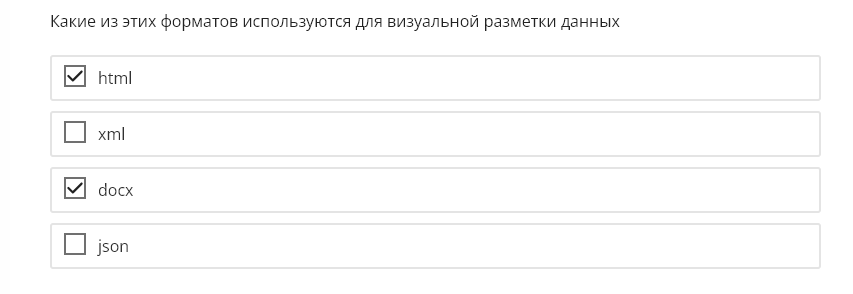

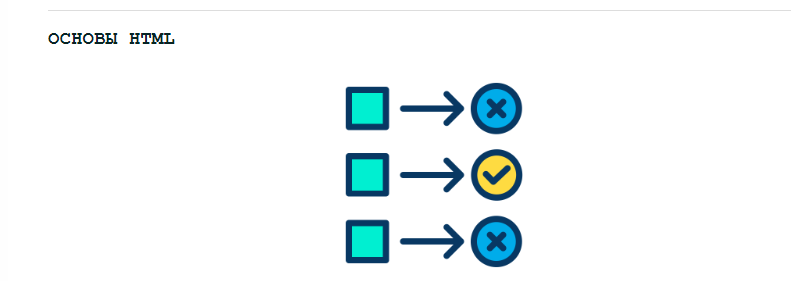

Прежде чем перейти к поиску информации в html, давайте вспомним, что он из себя представляет.

HTML — формат разметки страниц, созданный специально для интернета. Он позволяет разбивать страницу на блоки: мы размечаем, что окажется в боковой колонке, а что посередине  и т.д. Также он используется для описания стилей отображения: например, что будет отображаться как заголовок с большим текстом, а что как обычный текст.

HTML является близким родственником XML. Разметка делается с помощью так называемых тэгов, которые помещаются в угловые скобки, и сами, в свою очередь, являются как бы скобками для текста внутри.

In [ ]:
<h2> Это заголовок </h2>  

<div> А это обычный текст </div> 

У корректной html страницы есть заголовок (head) и тело страницы (body). В заголовке заключается техническая информация, подключаются скрипты и стили. В теле находится текст и данные, которые непосредственно  отображаются на странице в браузере. 

Разметка небольшой страницы выглядит примерно так

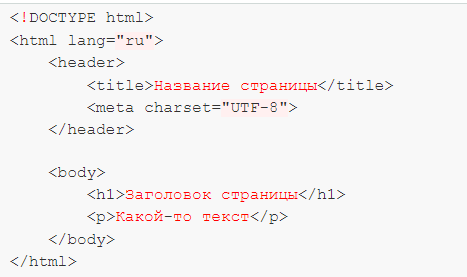

Вы можете сохраните это в текстовый файл с расширением .html и открыть этот файл в браузере.

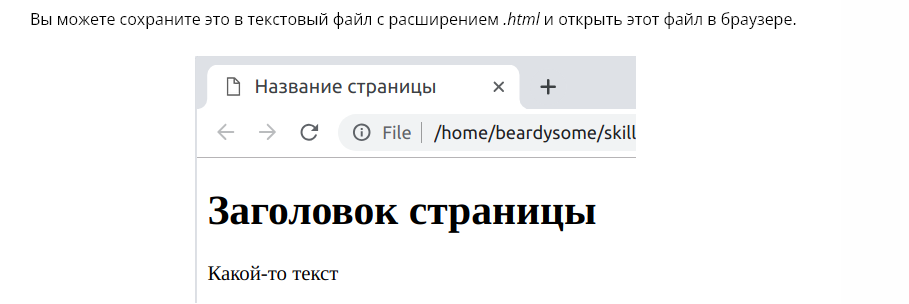

Тут стоит заметить, что тэги образуют иерархическую структуру, т.е. одни тэги расположены внутри других. В примере выше тэг <p> находится внутри тэга <body>.

Кроме того, у тэгов могут быть атрибуты, они пишутся внутри открывающегося тэга. Самые популярные атрибуты - это class и id.

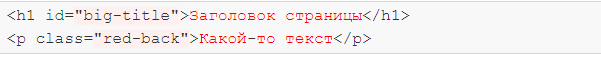

Полное описание возможностей html находится вне рамок этого курса. Вы можете подробнее почитать о нём здесь. 
http://htmlbook.ru/html

К счастью, нам и не нужно как-то подробно знать html, чтобы забирать информацию. Достаточно понимать, что:

есть тэги с разными именами;
у тэгов бывают атрибуты, вроде class и id;
тэги образуют иерархическую структуру, то есть одни тэги вложены в другие.

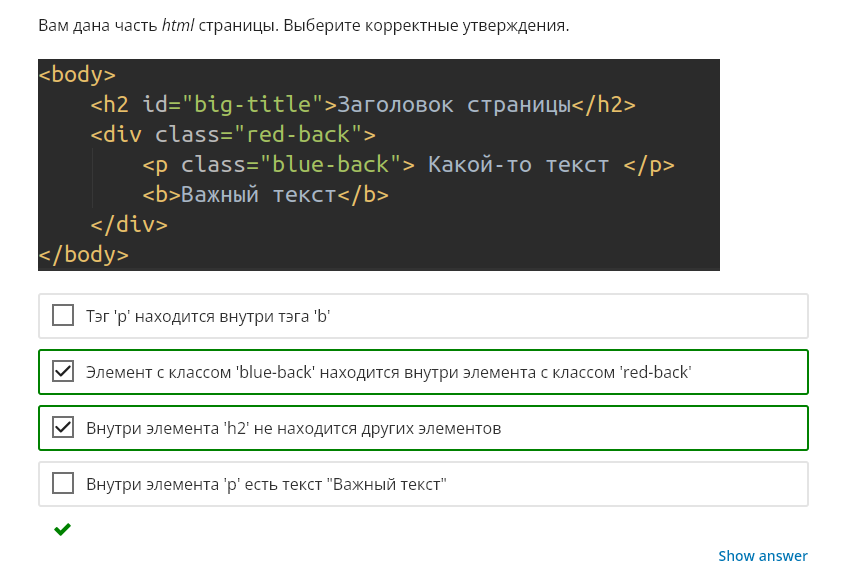

Для поиска данных на странице воспользуемся библиотекой BeautifulSoup. Она позволяет по названию тэгов и их атрибутов получать содержащийся в них текст.

Она не является частью стандартной библиотеки, поэтому для начала её нужно установить с помощью пакетного менеджера, например, введя в консоли:

In [6]:
!pip install beautifulsoup4 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Теперь мы можем получать данные из страницы. Давайте получим title (это строка, отображающая в браузерах на закладках)

In [19]:
# Импортируем наши библиотеки    
from bs4 import BeautifulSoup    
import requests    
    
# Получаем данные, как и ранее    
url = 'https://nplus1.ru/news/2019/06/04/slothbot'   
response = requests.get(url)    
    
# Теперь создадим объект BeautifulSoup, указывая html парсер    
page = BeautifulSoup(response.text, 'html.parser')    
    
# Всё готово, чтобы получать данные из страницы    
# Для начала получим title, отображающийся на закладках браузера    
print(page.title)  
# => <title>Робота-ленивца научили лазать по паутине из тросов</title>  
    
# Мы получили тэг. Чтобы достать из него текст, вызовем атрибут text    
page.title.text    

<title>Робота-ленивца научили лазать по паутине из тросов</title>


'Робота-ленивца научили лазать по паутине из тросов'

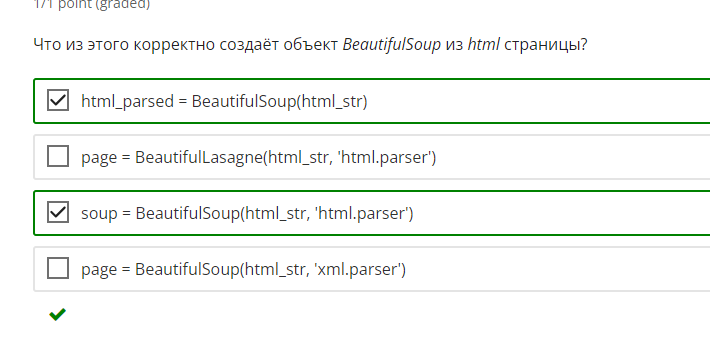

Мы получили данные из title, но как нам забрать текст с самой страницы? Мы можем сделать это, запросив содержимое определённых тэгов. 

Пусть мы знаем, что заголовок статьи находится в тэге h1. Тогда мы можем получить его текст с помощью метода find

In [11]:
print(page.find('h1').text)   


            Робота-ленивца научили лазать по паутине из тросов
          


Как узнать, какой именно тэг нужен? Проще всего это сделать с помощью "инструментов разработчика", которые есть во всех современных браузерах. Открыть их можно двумя способами:

1. Можно нажать на желаемый элемент правой кнопкой мыши и выбрать "Inspect" из выпадающего списка. 

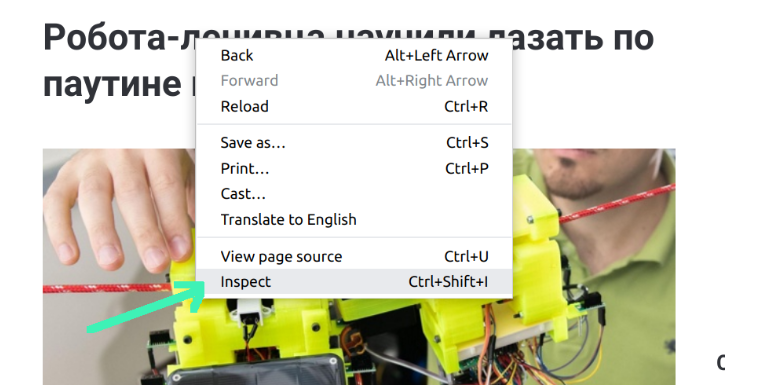

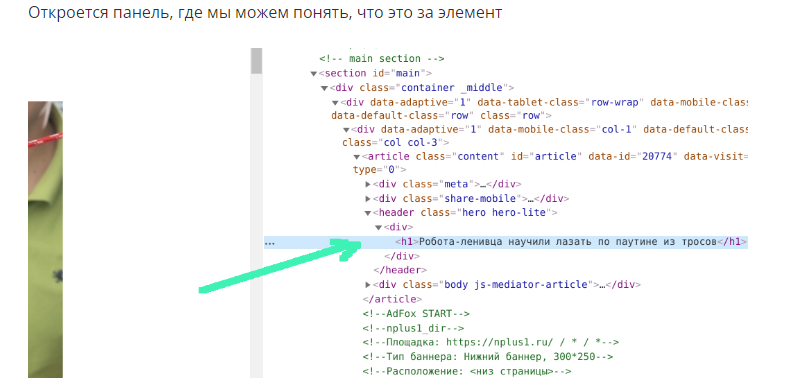

 Нажать горячие клавиши (ctrl-shift-i в chrome или ctrl-shift-c в firefox), которые откроют эту же панель и дальше найти элемент.

Воспользовавшись этим подходом, давайте получим время написания статьи. Смотрим, в каком она тэге

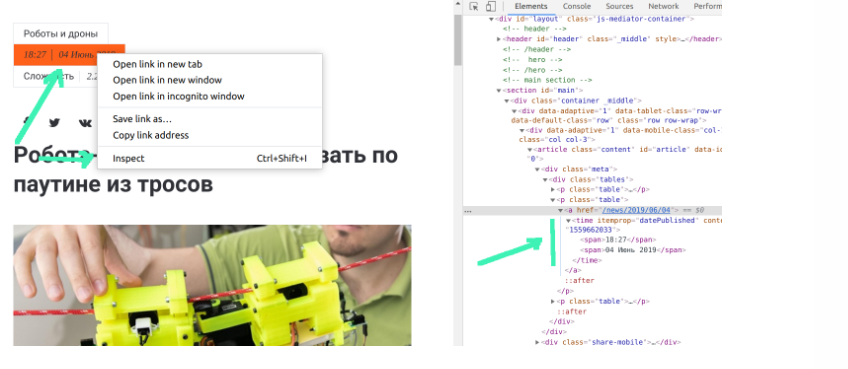

In [13]:
print(page.find('time'))   

None


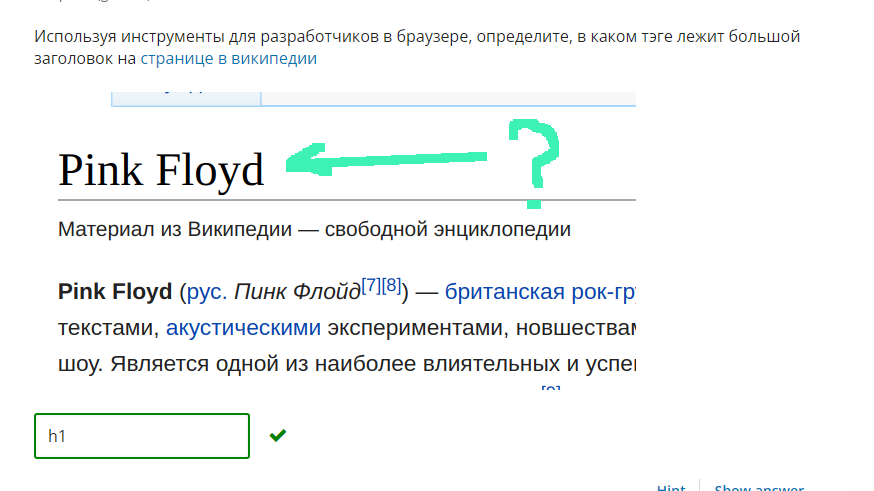

Напишите функцию wiki_header, которая по адресу страницы возвращает заголовок первого уровня для статей на Wikipedia.

Функция wiki_header принимает один аргумент - url.




In [14]:
def wiki_header(url):
  url = url
  response = requests.get(url)    
    
# Теперь создадим объект BeautifulSoup, указывая html парсер    
  page = BeautifulSoup(response.text, 'html.parser')    
    
  title=print(page.find('h1').text)   
# Мы получили тэг. Чтобы достать из него текст, вызовем атрибут text    
  return title  

In [15]:
wiki_header('https://en.wikipedia.org/wiki/Operating_system')


Operating system


In [16]:
import requests
from bs4 import BeautifulSoup

def wiki_header(url):
    page=BeautifulSoup(requests.get(url).text,'html.parser')
    header=page.find('h1').text
    return header

In [17]:
wiki_header('https://en.wikipedia.org/wiki/Operating_system')


'Operating system'

Мы рассмотрели базовый поиск конкретного элемента. Могут встречаться другие вариации:

когда нам нужно получить много похожих элементов; 
когда тэг атрибута неуникальный, тогда нам нужно использовать атрибуты (id, class), либо использовать вложенность.
Посмотрим на практике, что делать в случае, когда тэг элемента неуникальный. Пусть мы хотим получить сам текст статьи. Мы видим, что он находится в тэге div.

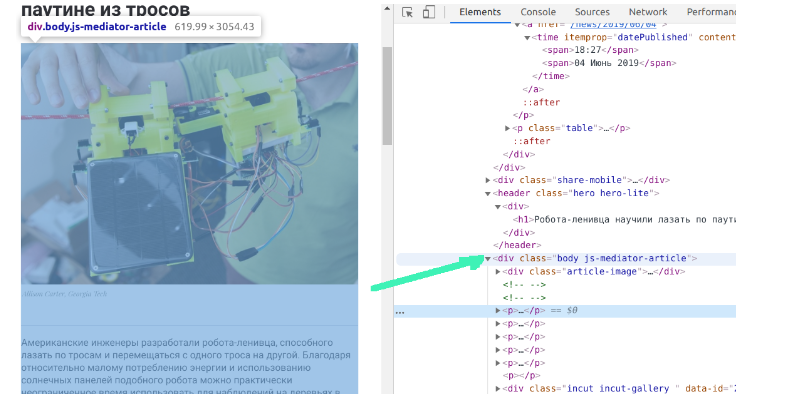

Тэги div очень распространённые, их много на странице. Если мы просто используем find, то получим первый попавшийся, но это не то, что нам надо.

In [20]:
print(page.find('div').text)  


























N + offline
N + production




                О нас
              

                Сложность
              

                Рекламодателям
              

                Авторам
              


Физика
Зоология
Астрономия
Генетика
Математика
Космонавтика


Археология
Нейронауки
На мышах
Звук
Красота
Научные закрытия


ИИ спешит на помощь
Когда рассеется дым
Книжная полка







































О
          нас
Сложность
Рекламодателям
Вакансии


Физика
Зоология
Астрономия
Генетика
Математика
Космонавтика
Археология
Нейронауки
На мышах
Звук
Красота
Научные закрытия
ИИ спешит на помощь
Когда рассеется дым
Книжная полка



N + offline
N + production












































18:27


04.06.19





2.2


Роботы и дроны























            Робота-ленивца научили лазать по паутине из тросов
          


Григорий Копиев




Американские инженеры разработали робота-ленивца, способного лазать по тросам и перемещаться с 

Тут мы можем заметить, что у искомого текста есть свой класс body js-mediator-article. Воспользуемся этим:  в метод find можно передать аргумент class_. Стоит обратить внимание на то, что поиск идет по вхождению (а не полному совпадению = равенству) текста в реальный атрибут.

In [22]:
print(page.find('div', class_='body'))  

None


ассмотрим случай, когда нам нужно сразу много элементов. Пусть мы хотим получить название всех ссылок на странице в википедии про языки программирования.

Для ссылок существует тэг <a></a>.  Давайте попробуем использовать find. 

In [23]:
url = 'https://en.wikipedia.org/wiki/List_of_programming_languages'  
  
response = requests.get(url)  
page = BeautifulSoup(response.text, 'html.parser')  
page.find('a')  

<a class="mw-jump-link" href="#bodyContent">Jump to content</a>

Что-то пошло не так, и мы получили только одну ссылку, хотя на странице их явно больше. Это происходит, потому что метод find возвращает только первый подходящий элемент. Если нам надо их больше, нужно воспользоваться методом find_all.

In [24]:
links = page.find_all('a')  
# Посмотрим, сколько всего мы получили  
print(len(links))
# => 935
  
# Посмотрим на некоторые из ссылок  
print([link.text for link in links[500:510]]) 

952
['MAD/I', 'Magik', 'Magma', 'Máni', 'Maple', 'MAPPER', 'MARK-IV', 'Mary', 'MATLAB', 'MASM Microsoft Assembly x86']


Ещё одна полезная вещь:  последовательный поиск, т.е. мы можем найти сначала один элемент, а потом сделать внутри него второй поиск. Давайте выведем названия всех ссылок для языков программирования, которые начинаются на литеру "A".

In [25]:
# Получаем все элементы с тегом 'div' и классом 'div-col'  
all_blocks = page.find_all('div', class_='div-col')  
  
# Выбираем первый по счету блок  
first_block = all_blocks[0]  
# Берём оттуда ссылки (ограничимся первыми десятью)
links = first_block.find_all('a')
print([link.text for link in links[:10]])

['A.NET (A#/A sharp)', 'A-0 System', 'A+ (A plus)', 'ABAP', 'ABC', 'ABC ALGOL', 'ACC', 'Accent (Rational Synergy)', 'Ace DASL (Distributed Application Specification Language)', 'Action!']


В заключение заметим, что BeautifulSoup — достаточно мощная библиотека. Мы рассмотрели базовые возможности, но полный список гораздо шире. С ним можно ознакомиться в официальной документации.

При работе с web-страницами было бы здорово получать содержимое  таблиц в виде датафрейма. Рассмотрим страницу ключевых показателей Центрального банка РФ cbr.ru. Наша задача будет состоять в том, чтобы получить одну из таблиц виджетов в виде датафрейма. Например, таблицу цен на драгоценные металлы.

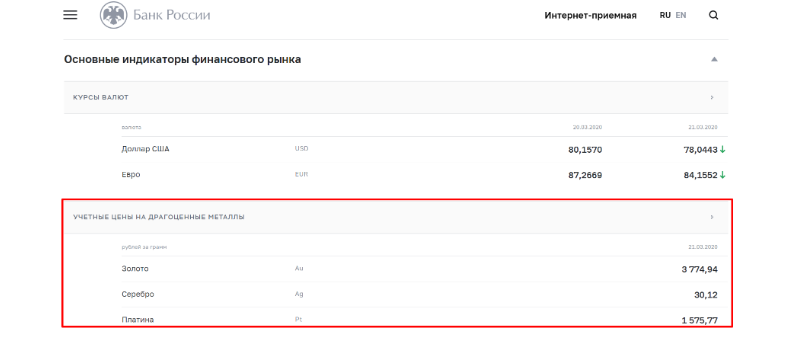

БАЗОВОЕ РЕШЕНИЕ

Метод read_html из pandas умеет автоматически находить на HTML-странице таблицы и возвращать их списком из датафреймов:

In [26]:
import pandas as pd  
url = 'https://www.cbr.ru/key-indicators/'  
# Таблица с драгметаллами оказалась третьей по счёту  
pd.read_html(url)[2] 

,0,1,2
0,рублей за грамм,18.03.2023,21.03.2023
1,Золото Au,"4 735,52","4 872,66"
2,Серебро Ag,5421,5435
3,Платина Pt,"2 374,22","2 431,24"
4,Палладий Pd,"3 539,17","3 449,43"


Если этого не происходит, но вы уверены в том, что порядок таблиц на странице неизменен, то можно вручную найти нужную таблицу на странице. Этому случаю посвящены следующие шаги.

ПОИСК ТАБЛИЦЫ С ПОМОЩЬЮ BEAUTIFULSOUP

Более надёжным решением является сначала получить только текст таблицы и передавать в pandas только её. Так же, как и в предыдущем разделе, используем requests и BeautifulSoup, чтобы получить данные со страницы.

А теперь — внимание! В случае работы с сайтом Центробанка нам нужно будет учесть ещё один нюанс. С недавнего времени администраторы стали блокировать обращения к сайту, поступающие не от «живых» пользователей, а от компьютерных программ (в том числе от той, которую мы собираемся написать прямо сейчас). Есть ли шанс в таких условиях всё-таки получить данные, не открывая страницу в браузере?

Безусловно, это возможно. Безвыходных положений вообще не бывает, особенно в программировании! Один из способов справиться с ситуацией — «притвориться» браузером :).

Каждый запрос, отправляемый с помощью команды get, имеет заголовок. Если заголовок не задан явно, то он создаётся автоматически, и туда добавляется информация в том числе о том, кто является субъектом (или источником) запроса — человек или программа. Чтобы «притвориться» браузером, нам просто нужно вручную дописать нужные сведения в этот заголовок. Подробнее о таком подходе можно почитать в этой статье.

Итоговый вариант кода после добавления заголовка должен выглядеть так:

In [27]:
from bs4 import BeautifulSoup  
import pandas as pd  
import requests  
  
url = 'https://www.cbr.ru/key-indicators/'
soup = BeautifulSoup(requests.get(url, headers={'User-Agent': 'Mozilla/5.0'}).text, 'html.parser')

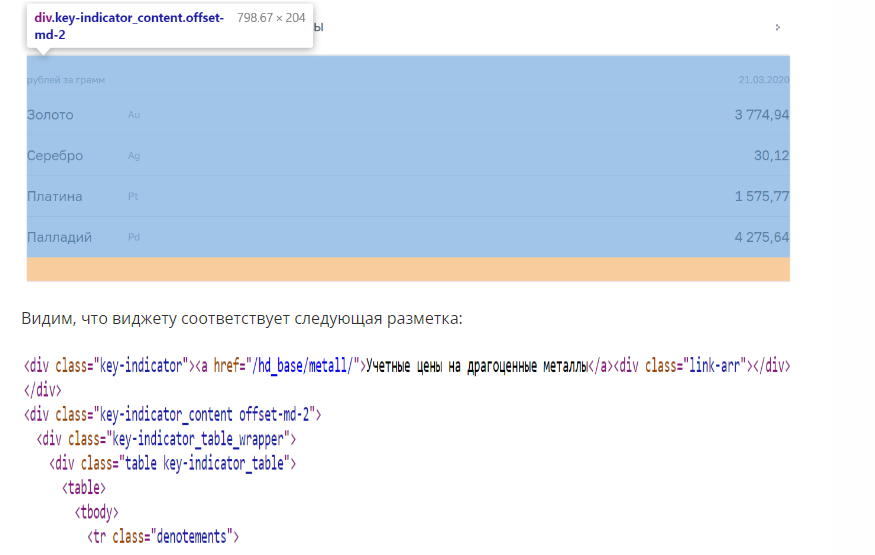

Нам необходимо добраться до кода таблицы, который начинается с тэга <table>. Таблиц на странице много, поэтому указываем путь к таблице виджета драгоценных металлов применяя знания полученные ранее:

In [28]:
all_blocks = soup.find_all('div', class_='key-indicator_content offset-md-2')
# Данные таблицы с драгметаллами находятся в третьем блоке
data = all_blocks[2].find('table')

In [29]:
data

<table>
<tbody>
<tr class="denotements">
<td class="value td-w-13">рублей за грамм</td>
<td class="value td-w-4 _end">18.03.2023</td>
<td class="value td-w-4 _end">21.03.2023</td>
</tr>
<tr>
<td class="value td-w-9 _inner">
<div class="d-flex title-subinfo">
<div class="col-md-5">Золото</div>
<div class="col-md-3 offset-md-1 _subinfo">Au</div>
</div>
</td>
<td class="value td-w-4 _bold _end mono-num">4 735,52</td>
<td class="value td-w-4 _bold _end mono-num _with-icon _up">4 872,66</td>
</tr>
<tr>
<td class="value td-w-9 _inner">
<div class="d-flex title-subinfo">
<div class="col-md-5">Серебро</div>
<div class="col-md-3 offset-md-1 _subinfo">Ag</div>
</div>
</td>
<td class="value td-w-4 _bold _end mono-num">54,21</td>
<td class="value td-w-4 _bold _end mono-num _with-icon _up">54,35</td>
</tr>
<tr>
<td class="value td-w-9 _inner">
<div class="d-flex title-subinfo">
<div class="col-md-5">Платина</div>
<div class="col-md-3 offset-md-1 _subinfo">Pt</div>
</div>
</td>
<td class="value td-w

In [30]:
df = pd.read_html(str(data))[0]  
df  

,0,1,2
0,рублей за грамм,18.03.2023,21.03.2023
1,Золото Au,"4 735,52","4 872,66"
2,Серебро Ag,5421,5435
3,Платина Pt,"2 374,22","2 431,24"
4,Палладий Pd,"3 539,17","3 449,43"


Напишите программу, которая забирает данные из таблицы рейтинга банков с https://www.banki.ru/banks/ratings/, делает из него датафрейм и сохраняет его в переменную df.

Не забудьте импортировать библиотеки.

In [31]:
from bs4 import BeautifulSoup  
import pandas as pd  
import requests
url='https://www.banki.ru/banks/ratings/'
soup = BeautifulSoup(requests.get(url, headers={'User-Agent': 'Mozilla/5.0'}).text, 'html.parser')
rank=soup.find(class_='standard-table standard-table--row-highlight margin-bottom-small margin-top-x-small')
df=pd.read_html(str(rank))[0]

In [33]:
df.head()

место                  название банка лицензия №, Регион  \
  место                  название банка лицензия №, Регион   
0     1            Сбербанк лицензия № 1481, Москва и обл.   
1     2        ВТБ лицензия № 1000, Санкт-Петербург и обл.   
2     3          Газпромбанк лицензия № 354, Москва и обл.   
3     4  НКЦ (Национальный клиринговый центр) лицензия ...   
4     5          Альфа-Банк лицензия № 1326, Москва и обл.   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         показатель,  тыс. рублей  \
  Февраль, 2022 Январь, 2022 Декабрь, 2021 Ноябрь, 2021 Октябрь, 2021 Сентябрь, 2021 Август, 2021 Июль, 2021 Июнь, 2021 Май, 2021 Апрель, 2021 Март, 2021 Февраль, 2021 Январь, 2021 Декабрь, 2020 Ноябрь, 2020 Октябрь, 2020 Сентябрь, 2020 Август, 2020 Июль, 2020 Июнь, 2020 Май, 2020 Апрель, 2020 Март, 2020 Февраль, 2020 Январь, 2020 Декабрь, 2019 Ноябрь, 2019 Октябрь, 2019 Сентябрь, 2019 Август, 2019 Июль, 2019 Июнь, 2019 Май, 2019 Апрель, 2019 Март, 2019 Февраль, 2019 Январь, 2019 Декабрь, 2018 Ноябрь, 2018 Октябрь, 2018 Сентябрь, 2018 Август, 2018 Июль, 2018 Июнь, 2018 Май, 2018 Апрель, 2018 Март, 2018 Февраль, 2018 Январь, 2018 Декабрь, 2017 Ноябрь, 2017 Октябрь, 2017 Сентябрь, 2017 Август, 2017 Июль, 2017 Июнь, 2017 Май, 2017 Апрель, 2017 Март, 2017 Февраль, 2017 Январь, 2017 Декабрь, 2016 Ноябрь, 2016 Октябрь, 2016 Сентябрь, 2016 Август, 2016 Июль, 2016 Июнь, 2016 Май, 2016 Апрель, 2016 Март, 2016 Февраль, 2016 Январь, 2016 Декабрь, 2015 Ноябрь, 2015 Октябрь, 2015 Сентябрь, 2015 Август, 2015 Июль, 2015 Июнь, 2015 Май, 2015 Апрель, 2015 Март, 2015 Февраль, 2015 Январь, 2015 Декабрь, 2014 Ноябрь, 2014 Октябрь, 2014 Сентябрь, 2014 Август, 2014 Июль, 2014 Июнь, 2014 Май, 2014 Апрель, 2014 Март, 2014 Февраль, 2014 Январь, 2014 Декабрь, 2013 Ноябрь, 2013 Октябрь, 2013 Сентябрь, 2013 Август, 2013 Июль, 2013 Июнь, 2013 Май, 2013 Апрель, 2013 Март, 2013 Февраль, 2013 Январь, 2013 Декабрь, 2012 Ноябрь, 2012 Октябрь, 2